# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [9]:
sinasc2 = sinasc_raw[['munResLat']]
sinasc2.head()

,munResLat
0,-11.93554
1,-11.93554
2,-11.93554
3,-12.13178
4,-11.93554


In [11]:
sinasc2.min()

munResLat   -13.49976
dtype: float64

In [ ]:
-8.76889

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [13]:
latitude = pd.cut(sinasc_raw['munResLat'], [-13.499760,-10.5,0])
latitude
pd.pivot_table(sinasc_raw,
               values=['SEMAGESTAC', 'CONSULTAS'],
               index=['LOCNASC',latitude],
               aggfunc=[ 'sum','mean',np.min,np.max,'median','std','var'],
               margins=True,
               dropna = False,
               margins_name='Total')

sum                 mean                 amin  \
                       CONSULTAS SEMAGESTAC CONSULTAS SEMAGESTAC CONSULTAS   
LOCNASC munResLat                                                            
1       (-13.5, -10.5]     47507   477845.0  3.695892  38.548322         1   
        (-10.5, 0.0]       48391   509041.0  3.470382  38.592949         1   
2       (-13.5, -10.5]        38      273.0  3.800000  39.000000         3   
        (-10.5, 0.0]          84      854.0  3.360000  38.818182         1   
3       (-13.5, -10.5]       106     1011.0  2.864865  37.444444         1   
        (-10.5, 0.0]          89     1188.0  2.542857  37.125000         1   
4       (-13.5, -10.5]        39      424.0  3.250000  35.333333         1   
        (-10.5, 0.0]          98      868.0  3.266667  37.739130         1   
Total                      96663   994652.0  3.576402  38.567352         1   

                                       amax               median             \
                       SEMAGESTAC CONSULTAS SEMAGESTAC CONSULTAS SEMAGESTAC   
LOCNASC munResLat                                                             
1       (-13.5, -10.5]       19.0         9       45.0       4.0       39.0   
        (-10.5, 0.0]         22.0         9       45.0       4.0       39.0   
2       (-13.5, -10.5]       37.0         4       41.0       4.0       39.0   
        (-10.5, 0.0]         33.0         4       41.0       4.0       39.0   
3       (-13.5, -10.5]       32.0         4       41.0       3.0       38.0   
        (-10.5, 0.0]         21.0         4       43.0       3.0       38.0   
4       (-13.5, -10.5]       27.0         4       41.0       3.0       36.0   
        (-10.5, 0.0]         29.0         9       41.0       3.0       38.0   
Total                        19.0         9       45.0       4.0       39.0   

                             std                  var             
                       CONSULTAS SEMAGESTAC CONSULTAS SEMAGESTAC  
LOCNASC munResLat                                                 
1       (-13.5, -10.5]  0.641679   2.008936  0.411752   4.035825  
        (-10.5, 0.0]    0.884889   2.009522  0.783029   4.038179  
2       (-13.5, -10.5]  0.421637   1.154701  0.177778   1.333333  
        (-10.5, 0.0]    1.036018   1.651446  1.073333   2.727273  
3       (-13.5, -10.5]  0.947575   2.485857  0.897898   6.179487  
        (-10.5, 0.0]    1.066684   4.163978  1.137815  17.338710  
4       (-13.5, -10.5]  0.866025   4.249777  0.750000  18.060606  
        (-10.5, 0.0]    1.412587   3.222328  1.995402  10.383399  
Total                   0.788492   2.016802  0.621720   4.067490

In [18]:
area = pd.cut(sinasc_raw['munResArea'], [0,3000,35000])

pd.pivot_table(data=sinasc_raw,
               values=['IDADEMAE', 'IDADEPAI'],
               index=['LOCNASC',area],
               aggfunc=['sum','mean',np.min,np.max,'median','std','var'],
               margins=True,
               dropna = False,
               margins_name='Total')

sum                 mean                amin  \
                      IDADEMAE  IDADEPAI   IDADEMAE   IDADEPAI IDADEMAE   
LOCNASC munResArea                                                        
1       (0, 3000]       136771   77992.0  26.317298  31.097289       11   
        (3000, 35000]   564653  157752.0  26.044880  31.096393       12   
2       (0, 3000]          260      30.0  26.000000  30.000000       19   
        (3000, 35000]      619     136.0  24.760000  34.000000       15   
3       (0, 3000]          195      52.0  27.857143  26.000000       19   
        (3000, 35000]     1636     302.0  25.169231  30.200000       13   
4       (0, 3000]          163       0.0  32.600000        NaN       23   
        (3000, 35000]      940     234.0  24.736842  29.250000       15   
Total                   705261  236520.0  26.093718  31.092415       11   

                                   amax            median                std  \
                      IDADEPAI IDADEMAE IDADEPAI IDADEMAE IDADEPAI  IDADEMAE   
LOCNASC munResArea                                                             
1       (0, 3000]         16.0       53     69.0     26.0     30.0  6.302482   
        (3000, 35000]     15.0       53     86.0     25.0     30.0  6.405365   
2       (0, 3000]         30.0       36     30.0     25.0     30.0  5.354126   
        (3000, 35000]     25.0       38     50.0     25.0     30.5  5.456495   
3       (0, 3000]         20.0       42     32.0     27.0     26.0  7.798046   
        (3000, 35000]     20.0       42     39.0     24.0     29.5  6.790548   
4       (0, 3000]          NaN       44      NaN     31.0      NaN  7.700649   
        (3000, 35000]     21.0       37     52.0     24.0     25.5  6.297508   
Total                     15.0       53     86.0     26.0     30.0  6.387094   

                                        var              
                        IDADEPAI   IDADEMAE    IDADEPAI  
LOCNASC munResArea                                       
1       (0, 3000]       7.676815  39.721281   58.933491  
        (3000, 35000]   7.816733  41.028707   61.101314  
2       (0, 3000]            NaN  28.666667         NaN  
        (3000, 35000]  11.045361  29.773333  122.000000  
3       (0, 3000]       8.485281  60.809524   72.000000  
        (3000, 35000]   5.452828  46.111538   29.733333  
4       (0, 3000]            NaN  59.300000         NaN  
        (3000, 35000]  10.498299  39.658606  110.214286  
Total                   7.771165  40.794968   60.391011

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [15]:
area2 = pd.qcut(sinasc_raw['munResAlt'], 3)

sinasc_raw.pivot_table(values=('QTDGESTANT','SEMAGESTAC'),
                     index=['GESTACAO',area2],
                     aggfunc=['sum','mean',np.min,np.max,'median','std','var'])

sum                  mean  \
                                    QTDGESTANT SEMAGESTAC QTDGESTANT   
GESTACAO            munResAlt                                          
22 a 27 semanas     (84.999, 111.0]       47.0     1023.0   1.236842   
                    (111.0, 177.0]        30.0      629.0   1.304348   
                    (177.0, 595.0]        22.0      533.0   1.047619   
28 a 31 semanas     (84.999, 111.0]       89.0     2060.0   1.508475   
                    (111.0, 177.0]        57.0     1681.0   1.075472   
                    (177.0, 595.0]        48.0     1194.0   1.263158   
32 a 36 semanas     (84.999, 111.0]     1013.0    26428.0   1.530211   
                    (111.0, 177.0]      1274.0    29691.0   1.542373   
                    (177.0, 595.0]       735.0    22432.0   1.176000   
37 a 41 semanas     (84.999, 111.0]     9571.0   287553.0   1.461221   
                    (111.0, 177.0]      9647.0   316370.0   1.196601   
                    (177.0, 595.0]      7902.0   275203.0   1.120374   
42 semanas e mais   (84.999, 111.0]      180.0     6136.0   1.406250   
                    (111.0, 177.0]       434.0    13844.0   1.339506   
                    (177.0, 595.0]       262.0     9696.0   1.149123   
Menos de 22 semanas (84.999, 111.0]        0.0       21.0   0.000000   
                    (111.0, 177.0]         1.0       61.0   0.333333   
                    (177.0, 595.0]         5.0       61.0   1.666667   

                                                     amin             \
                                    SEMAGESTAC QTDGESTANT SEMAGESTAC   
GESTACAO            munResAlt                                          
22 a 27 semanas     (84.999, 111.0]  25.575000        0.0       22.0   
                    (111.0, 177.0]   25.160000        0.0       22.0   
                    (177.0, 595.0]   25.380952        0.0       22.0   
28 a 31 semanas     (84.999, 111.0]  29.855072        0.0       28.0   
                    (111.0, 177.0]   30.017857        0.0       28.0   
                    (177.0, 595.0]   29.850000        0.0       28.0   
32 a 36 semanas     (84.999, 111.0]  34.957672        0.0       32.0   
                    (111.0, 177.0]   34.930588        0.0       32.0   
                    (177.0, 595.0]   34.940810        0.0       32.0   
37 a 41 semanas     (84.999, 111.0]  39.021984        0.0       37.0   
                    (111.0, 177.0]   38.913899        0.0       37.0   
                    (177.0, 595.0]   38.843049        0.0       37.0   
42 semanas e mais   (84.999, 111.0]  42.611111        0.0       42.0   
                    (111.0, 177.0]   42.466258        0.0       42.0   
                    (177.0, 595.0]   42.340611        0.0       42.0   
Menos de 22 semanas (84.999, 111.0]  21.000000        0.0       21.0   
                    (111.0, 177.0]   20.333333        0.0       19.0   
                    (177.0, 595.0]   20.333333        0.0       19.0   

                                          amax                median  \
                                    QTDGESTANT SEMAGESTAC QTDGESTANT   
GESTACAO            munResAlt                                          
22 a 27 semanas     (84.999, 111.0]        5.0       27.0        1.0   
                    (111.0, 177.0]         6.0       27.0        1.0   
                    (177.0, 595.0]         2.0       27.0        1.0   
28 a 31 semanas     (84.999, 111.0]        8.0       31.0        1.0   
                    (111.0, 177.0]         5.0       31.0        1.0   
                    (177.0, 595.0]         4.0       31.0        1.0   
32 a 36 semanas     (84.999, 111.0]       13.0       36.0        1.0   
                    (111.0, 177.0]        10.0       36.0        1.0   
                    (177.0, 595.0]         8.0       36.0        1.0   
37 a 41 semanas     (84.999, 111.0]       52.0       41.0        1.0   
                    (111.0, 177.0]        14.0       41.0        1.0   
         

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [19]:
area2 = pd.qcut(sinasc_raw['munResAlt'], 3)

sinasc_raw.pivot_table(values=('QTDGESTANT','SEMAGESTAC'),
                     index=['GESTACAO',area2],
                     aggfunc=['sum','mean',np.min,np.max,'median','std','var'])

sum                  mean  \
                                    QTDGESTANT SEMAGESTAC QTDGESTANT   
GESTACAO            munResAlt                                          
22 a 27 semanas     (84.999, 111.0]       47.0     1023.0   1.236842   
                    (111.0, 177.0]        30.0      629.0   1.304348   
                    (177.0, 595.0]        22.0      533.0   1.047619   
28 a 31 semanas     (84.999, 111.0]       89.0     2060.0   1.508475   
                    (111.0, 177.0]        57.0     1681.0   1.075472   
                    (177.0, 595.0]        48.0     1194.0   1.263158   
32 a 36 semanas     (84.999, 111.0]     1013.0    26428.0   1.530211   
                    (111.0, 177.0]      1274.0    29691.0   1.542373   
                    (177.0, 595.0]       735.0    22432.0   1.176000   
37 a 41 semanas     (84.999, 111.0]     9571.0   287553.0   1.461221   
                    (111.0, 177.0]      9647.0   316370.0   1.196601   
                    (177.0, 595.0]      7902.0   275203.0   1.120374   
42 semanas e mais   (84.999, 111.0]      180.0     6136.0   1.406250   
                    (111.0, 177.0]       434.0    13844.0   1.339506   
                    (177.0, 595.0]       262.0     9696.0   1.149123   
Menos de 22 semanas (84.999, 111.0]        0.0       21.0   0.000000   
                    (111.0, 177.0]         1.0       61.0   0.333333   
                    (177.0, 595.0]         5.0       61.0   1.666667   

                                                     amin             \
                                    SEMAGESTAC QTDGESTANT SEMAGESTAC   
GESTACAO            munResAlt                                          
22 a 27 semanas     (84.999, 111.0]  25.575000        0.0       22.0   
                    (111.0, 177.0]   25.160000        0.0       22.0   
                    (177.0, 595.0]   25.380952        0.0       22.0   
28 a 31 semanas     (84.999, 111.0]  29.855072        0.0       28.0   
                    (111.0, 177.0]   30.017857        0.0       28.0   
                    (177.0, 595.0]   29.850000        0.0       28.0   
32 a 36 semanas     (84.999, 111.0]  34.957672        0.0       32.0   
                    (111.0, 177.0]   34.930588        0.0       32.0   
                    (177.0, 595.0]   34.940810        0.0       32.0   
37 a 41 semanas     (84.999, 111.0]  39.021984        0.0       37.0   
                    (111.0, 177.0]   38.913899        0.0       37.0   
                    (177.0, 595.0]   38.843049        0.0       37.0   
42 semanas e mais   (84.999, 111.0]  42.611111        0.0       42.0   
                    (111.0, 177.0]   42.466258        0.0       42.0   
                    (177.0, 595.0]   42.340611        0.0       42.0   
Menos de 22 semanas (84.999, 111.0]  21.000000        0.0       21.0   
                    (111.0, 177.0]   20.333333        0.0       19.0   
                    (177.0, 595.0]   20.333333        0.0       19.0   

                                          amax                median  \
                                    QTDGESTANT SEMAGESTAC QTDGESTANT   
GESTACAO            munResAlt                                          
22 a 27 semanas     (84.999, 111.0]        5.0       27.0        1.0   
                    (111.0, 177.0]         6.0       27.0        1.0   
                    (177.0, 595.0]         2.0       27.0        1.0   
28 a 31 semanas     (84.999, 111.0]        8.0       31.0        1.0   
                    (111.0, 177.0]         5.0       31.0        1.0   
                    (177.0, 595.0]         4.0       31.0        1.0   
32 a 36 semanas     (84.999, 111.0]       13.0       36.0        1.0   
                    (111.0, 177.0]        10.0       36.0        1.0   
                    (177.0, 595.0]         8.0       36.0        1.0   
37 a 41 semanas     (84.999, 111.0]       52.0       41.0        1.0   
                    (111.0, 177.0]        14.0       41.0        1.0   
         

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

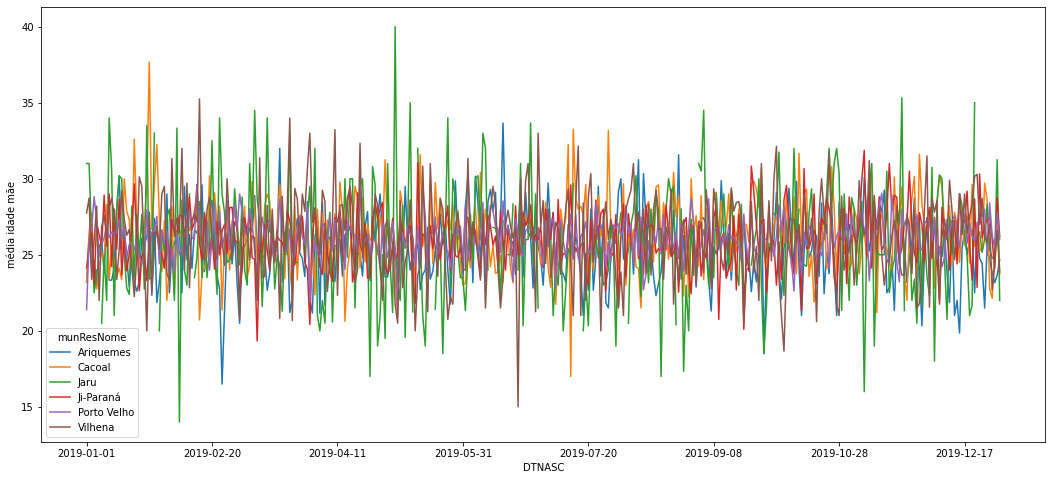

In [20]:
imediatas = {"Candeias do Jamari": "Porto Velho","Guajará-Mirim": "Porto Velho","Itapuã do Oeste": "Porto Velho","Nova Mamoré": "Porto Velho","Porto Velho": "Porto Velho","Alto Paraíso": "Ariquemes","Ariquemes": "Ariquemes",
"Buritis": "Ariquemes","Cacaulândia": "Ariquemes","Campo Novo de Rondônia": "Ariquemes","Cujubim": "Ariquemes","Monte Negro": "Ariquemes","Rio Crespo": "Ariquemes","Governador Jorge Teixeira": "Jaru","Jaru": "Jaru",
"Machadinho d'Oeste": "Jaru","Theobroma": "Jaru","Vale do Anari": "Jaru","Alvorada d'Oeste": "Ji-Paraná","Costa Marques": "Ji-Paraná","Ji-Paraná": "Ji-Paraná","Mirante da Serra": "Ji-Paraná","Nova União": "Ji-Paraná",
"Ouro Preto do Oeste": "Ji-Paraná","Presidente Médici": "Ji-Paraná","São Francisco do Guaporé": "Ji-Paraná","São Miguel do Guaporé": "Ji-Paraná","Seringueiras": "Ji-Paraná","Teixeirópolis": "Ji-Paraná","Urupá": "Ji-Paraná","Vale do Paraíso": "Ji-Paraná",
"Alta Floresta d'Oeste": "Cacoal","Alto Alegre dos Parecis": "Cacoal","Cacoal": "Cacoal","Castanheiras": "Cacoal","Espigão d'Oeste": "Cacoal","Ministro Andreazza": "Cacoal","Nova Brasilândia d'Oeste": "Cacoal","Novo Horizonte do Oeste": "Cacoal",
"Parecis": "Cacoal","Pimenta Bueno": "Cacoal","Primavera de Rondônia": "Cacoal","Rolim de Moura": "Cacoal","Santa Luzia d'Oeste": "Cacoal","São Felipe d'Oeste": "Cacoal","Cabixi": "Vilhena","Cerejeiras": "Vilhena",
"Chupinguaia": "Vilhena","Colorado do Oeste": "Vilhena","Corumbiara": "Vilhena","Pimenteiras do Oeste": "Vilhena","Vilhena": "Vilhena"}

sinasc_2 = sinasc_raw.set_index('munResNome')

sinasc_2.groupby(['DTNASC', imediatas])['IDADEMAE'].mean().unstack().plot(figsize=[18,8])
plt.ylabel('média idade mãe');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


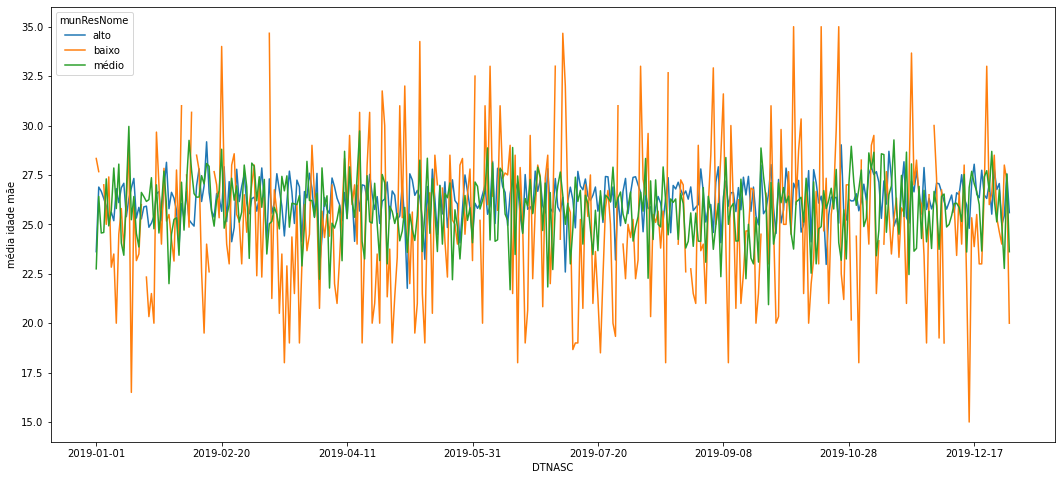

In [21]:
idh = {"Porto Velho": "alto","Vilhena": "alto","Cacoal": "alto","Ji-Paraná": "alto","Pimenta Bueno": "alto","Ariquemes": "alto","Rolim de Moura": "alto","Cerejeiras": "médio",
"Jaru": "médio","Colorado do Oeste": "médio","Ouro Preto do Oeste": "médio","Espigão d'Oeste": "médio","Santa Luzia d'Oeste": "médio","Pimenteiras do Oeste": "médio","Presidente Médici": "médio","Castanheiras": "médio",
"Guajará-Mirim": "médio","Chupinguaia": "médio","Cabixi": "médio","Candeias do Jamari": "médio","São Felipe d'Oeste": "médio","Cacaulândia": "médio","São Miguel do Guaporé": "médio",
"Mirante da Serra": "médio","Alvorada d'Oeste": "médio","Teixeirópolis": "médio","Nova Brasilândia d'Oeste": "médio","Rio Crespo": "médio","Primavera de Rondônia": "médio","Alta Floresta d'Oeste": "médio","Ministro Andreazza": "médio",
"Novo Horizonte do Oeste": "médio","Vale do Paraíso": "médio","Alto Paraíso": "médio","Parecis": "médio","Buritis": "médio","Itapuã do Oeste": "médio","Corumbiara": "médio","Cujubim": "médio",
"Costa Marques": "médio","São Francisco do Guaporé": "médio","Urupá": "médio","Monte Negro": "médio","Seringueiras": "baixo","Governador Jorge Teixeira": "baixo","Machadinho d'Oeste": "baixo","Campo Novo de Rondônia": "baixo",
"Alto Alegre dos Parecis": "baixo","Theobroma": "baixo","Nova União": "baixo","Nova Mamoré": "baixo","Vale do Anari": "baixo"}
sinasc_2.groupby(['DTNASC', idh])['IDADEMAE'].mean().unstack().plot(figsize=[18,8])
plt.ylabel('média idade mãe');

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


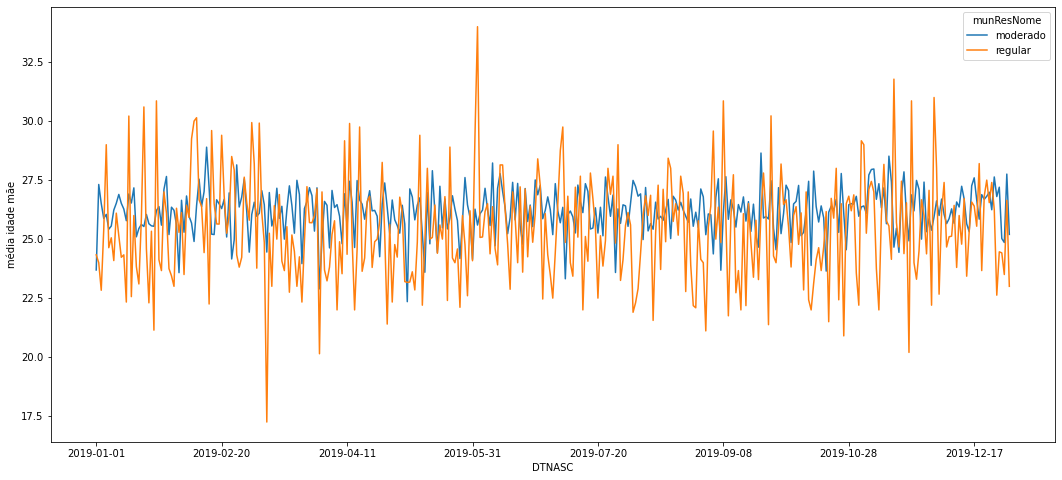

In [22]:
ifdm = {"Ariquemes": "moderado","Vilhena": "moderado","Pimenta Bueno": "moderado","Porto Velho": "moderado",
"Ji-Paraná": "moderado","Cacoal": "moderado","Santa Luzia d'Oeste": "moderado","Rolim de Moura": "moderado",
"Chupinguaia": "moderado","São Miguel do Guaporé": "moderado","Pimenteiras do Oeste": "moderado","Teixeirópolis": "moderado",
"Colorado do Oeste": "moderado","Jaru": "moderado","Rio Crespo": "moderado","Primavera de Rondônia": "moderado","Alta Floresta d'Oeste": "moderado","Ouro Preto do Oeste": "moderado",
"São Francisco do Guaporé": "moderado","Candeias do Jamari": "moderado","Buritis": "moderado","São Felipe d'Oeste": "moderado",
"Presidente Médici": "moderado","Cerejeiras": "moderado","Monte Negro": "moderado","Urupá": "moderado","Espigão d'Oeste": "regular","Seringueiras": "regular","Alvorada d'Oeste": "regular","Itapuã do Oeste": "regular",
"Cabixi": "regular","Novo Horizonte do Oeste": "regular","Nova Brasilândia d'Oeste": "regular","Vale do Paraíso": "regular",
"Corumbiara": "regular","Alto Paraíso": "regular","Cacaulândia": "regular","Vale do Anari": "regular",
"Ministro Andreazza": "regular","Costa Marques": "regular","Nova União": "regular","Guajará-Mirim": "regular",
"Mirante da Serra": "regular","Parecis": "regular","Castanheiras": "regular","Theobroma": "regular",
"Machadinho d'Oeste": "regular","Campo Novo de Rondônia": "regular","Nova Mamoré": "regular","Cujubim": "regular",
"Alto Alegre dos Parecis": "regular","Governador Jorge Teixeira": "regular"}

sinasc_2.groupby(['DTNASC', ifdm])['IDADEMAE'].mean().unstack().plot(figsize=[18,8])
plt.ylabel('média idade mãe');

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


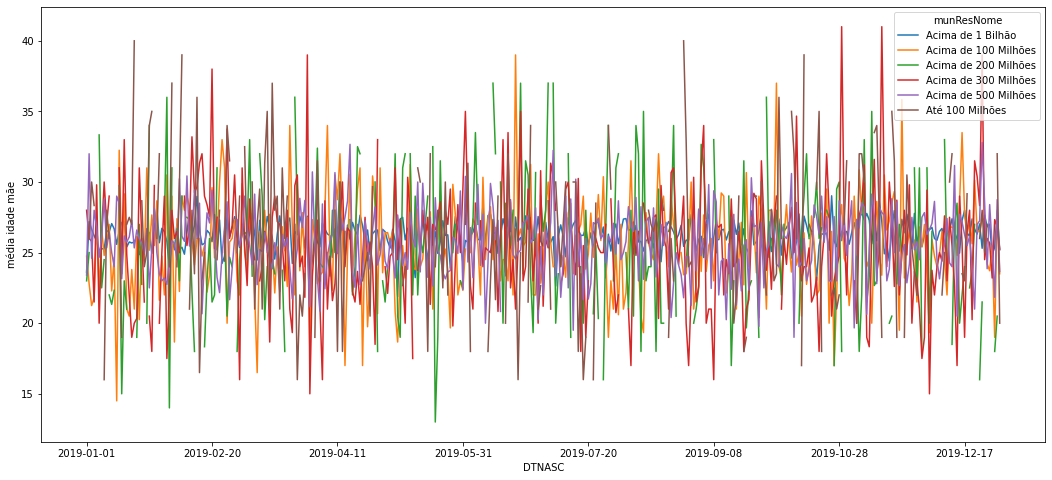

In [23]:
pib = { "Porto Velho": "Acima de 1 Bilhão","Ji-Paraná": "Acima de 1 Bilhão","Vilhena": "Acima de 1 Bilhão","Ariquemes": "Acima de 1 Bilhão",
"Cacoal": "Acima de 1 Bilhão","Jaru": "Acima de 1 Bilhão","Rolim de Moura": "Acima de 1 Bilhão","Pimenta Bueno": "Acima de 1 Bilhão",
"Guajará-Mirim": "Acima de 500 Milhões","Ouro Preto do Oeste": "Acima de 500 Milhões","Buritis": "Acima de 500 Milhões","Machadinho do Oeste": "Acima de 500 Milhões",
"Espigão d'Oeste": "Acima de 500 Milhões","São Miguel do Guaporé": "Acima de 500 Milhões","Candeias do Jamari": "Acima de 500 Milhões","Nova Mamoré": "Acima de 500 Milhões",
"Cerejeiras": "Acima de 500 Milhões","Alta Floresta do Oeste": "Acima de 300 Milhões","Presidente Médici": "Acima de 300 Milhões","Cujubim": "Acima de 300 Milhões",
"Nova Brasilândia do Oeste": "Acima de 300 Milhões","Alto Paraíso": "Acima de 300 Milhões","São Francisco do Guaporé": "Acima de 300 Milhões","Colorado do Oeste": "Acima de 300 Milhões",
"Monte Negro": "Acima de 200 Milhões","Alto Alegre dos Parecis": "Acima de 200 Milhões","Campo Novo de Rondônia": "Acima de 200 Milhões","Alvorada do Oeste": "Acima de 200 Milhões",
"Chupinguaia": "Acima de 100 Milhões","Corumbiara": "Acima de 100 Milhões","Ministro Andreazza": "Acima de 100 Milhões","Urupá": "Acima de 100 Milhões",
"Costa Marques": "Acima de 100 Milhões","Seringueiras": "Acima de 100 Milhões","Mirante da Serra": "Acima de 100 Milhões","Governador Jorge Teixeira": "Acima de 100 Milhões",
"Theobroma": "Acima de 100 Milhões","Santa Luzia do Oeste": "Acima de 100 Milhões","Novo Horizonte do Oeste": "Acima de 100 Milhões","Itapuã do Oeste": "Acima de 100 Milhões",
"Vale do Paraíso": "Acima de 100 Milhões","Cacaulândia": "Acima de 100 Milhões","Cabixi": "Acima de 100 Milhões","Vale do Anari": "Acima de 100 Milhões",
"Nova União": "Até 100 Milhões","Parecis": "Até 100 Milhões","Rio Crespo": "Até 100 Milhões","Pimenteiras do Oeste": "Até 100 Milhões",
"Teixeirópolis": "Até 100 Milhões","São Felipe do Oeste": "Até 100 Milhões","Castanheiras": "Até 100 Milhões","Primavera de Rondônia": "Até 100 Milhões"}

sinasc_2.groupby(['DTNASC', pib])['IDADEMAE'].mean().unstack().plot(figsize=[18,8])
plt.ylabel('média idade mãe');

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [ ]:
As mulheres em municípios com menor índice de IDH tem maior probabilidade de engravidarem novas.
As cidades rurais concentram a maior taxa de mulheres que engravidam mais velhas.
